In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
df_Train=pd.read_csv('Train_New.csv')
df_Test=pd.read_csv('Test_New.csv')

In [3]:
df_Train.head()

,Package Name,Package Type,D1,D2,D3,D4,D5,N1,N2,N3,...,SP12,SP13,SP14,SP15,SP16,SP17,SP18,SP19,Cancellation Rules,Per Person Price
0,422,4,79,118,54,9,30,1,2,2,...,166,136,108,93,65,46,27,18,5,11509.0
1,1152,3,107,95,90,49,30,1,2,1,...,166,136,108,93,65,46,27,18,0,22485.5
2,1437,2,113,24,69,49,30,2,1,0,...,166,136,108,93,65,46,27,18,0,12421.5
3,487,3,71,68,0,33,30,2,1,1,...,166,136,108,93,65,46,27,18,0,35967.0
4,196,3,86,13,69,49,30,4,3,0,...,166,136,108,93,65,46,27,18,0,25584.0


In [4]:
df_Test.head()

,Package Name,Package Type,D1,D2,D3,D4,D5,N1,N2,N3,...,SP11,SP12,SP13,SP14,SP15,SP16,SP17,SP18,SP19,Cancellation Rules
0,841,2,35,94,69,49,30,5,0,0,...,194,166,136,108,93,65,46,27,18,0
1,1061,2,10,94,69,49,30,2,0,0,...,194,166,136,108,93,65,46,27,18,9
2,2127,4,71,94,69,49,30,3,0,0,...,194,166,136,108,93,65,46,27,18,9
3,1471,1,71,94,69,49,30,3,0,0,...,194,166,136,108,93,65,46,27,18,9
4,1938,2,21,83,92,1,30,1,2,1,...,194,166,136,108,93,65,46,27,18,0


In [5]:
print(df_Train.shape)
print(df_Test.shape)

(21000, 49)
(9000, 48)


In [8]:
## Removing Uncesseary features!

In [6]:
df_Train.drop('D1', axis=1, inplace=True)
df_Train.drop('PC1', axis=1, inplace=True)
df_Train.drop('Year', axis=1, inplace=True)
df_Train.drop('Month', axis=1, inplace=True)
df_Train.drop('SP5', axis=1, inplace=True)
df_Train.drop('Package Type', axis=1, inplace=True)
df_Train.drop('SP3', axis=1, inplace=True)
df_Train.drop('Start City', axis=1, inplace=True)
df_Train.drop('Package Name', axis=1, inplace=True)
df_Train.drop('SP1', axis=1, inplace=True)
df_Train.drop('SP4', axis=1, inplace=True)
df_Train.drop('SP6', axis=1, inplace=True)
df_Train.drop('Hotel Details', axis=1, inplace=True)
df_Train.drop('A1', axis=1, inplace=True)

In [7]:
df_Test.drop('D1', axis=1, inplace=True)
df_Test.drop('PC1', axis=1, inplace=True)
df_Test.drop('Year', axis=1, inplace=True)
df_Test.drop('Month', axis=1, inplace=True)
df_Test.drop('SP5', axis=1, inplace=True)
df_Test.drop('Package Type', axis=1, inplace=True)
df_Test.drop('SP3', axis=1, inplace=True)
df_Test.drop('Start City', axis=1, inplace=True)
df_Test.drop('Package Name', axis=1, inplace=True)
df_Test.drop('SP1', axis=1, inplace=True)
df_Test.drop('SP4', axis=1, inplace=True)
df_Test.drop('SP6', axis=1, inplace=True)
df_Test.drop('Hotel Details', axis=1, inplace=True)
df_Test.drop('A1', axis=1, inplace=True)

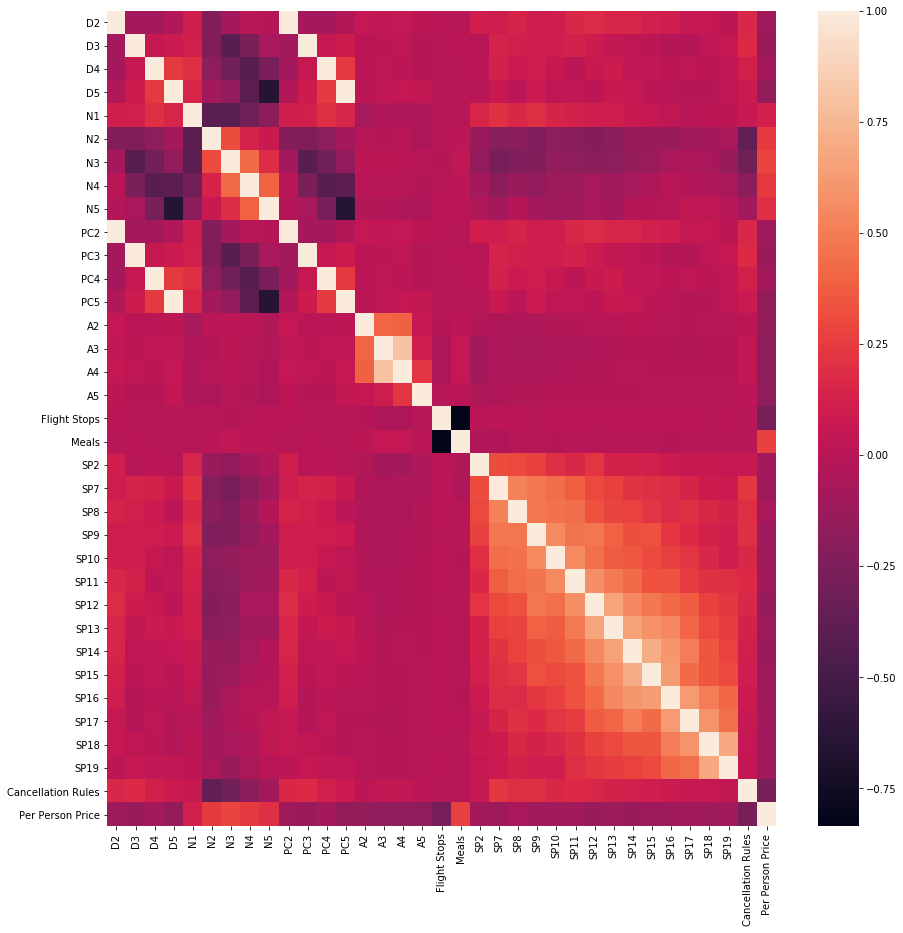

In [10]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_Train.corr())

In [12]:
df_Train.drop('PC2', axis=1, inplace=True)
df_Train.drop('PC3', axis=1, inplace=True)
df_Train.drop('PC4', axis=1, inplace=True)
df_Train.drop('PC5', axis=1, inplace=True)
df_Train.drop('Meals', axis=1, inplace=True)

In [13]:
df_Test.drop('PC2', axis=1, inplace=True)
df_Test.drop('PC3', axis=1, inplace=True)
df_Test.drop('PC4', axis=1, inplace=True)
df_Test.drop('PC5', axis=1, inplace=True)
df_Test.drop('Meals', axis=1, inplace=True)

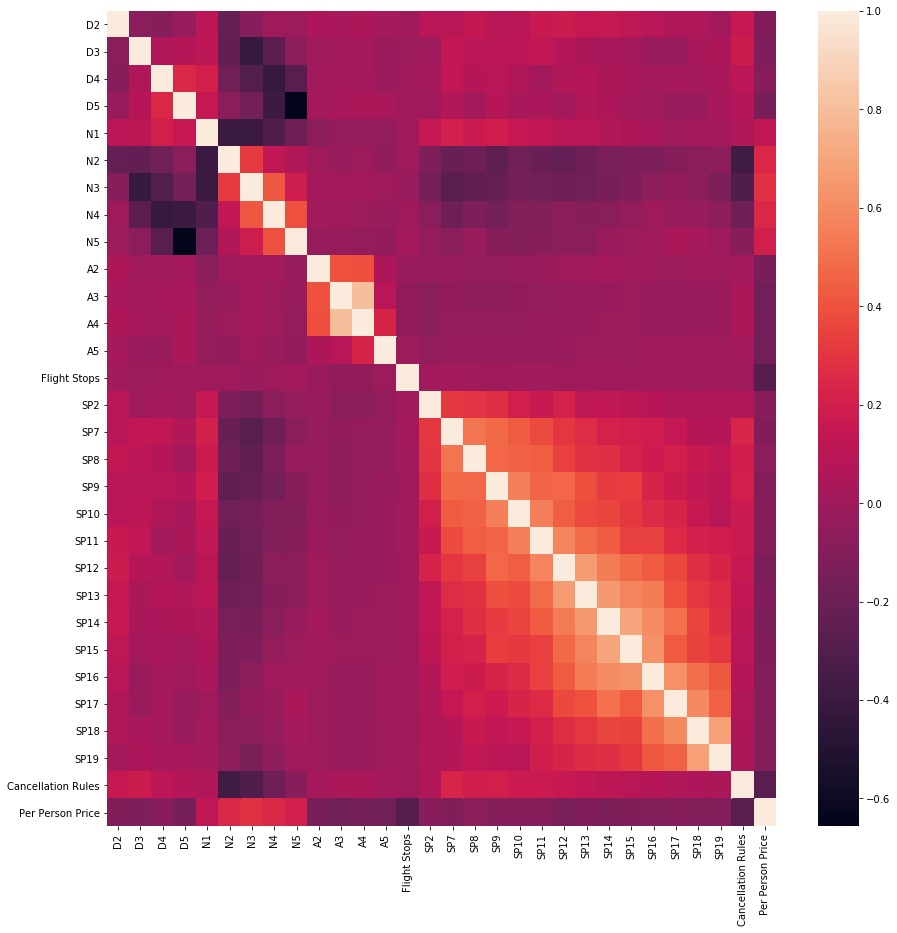

In [14]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_Train.corr())

In [15]:
df_Train.drop('N5', axis=1, inplace=True)
df_Test.drop('N5', axis=1, inplace=True)

In [16]:
df_Train.drop('A4', axis=1, inplace=True)
df_Test.drop('A4', axis=1, inplace=True)

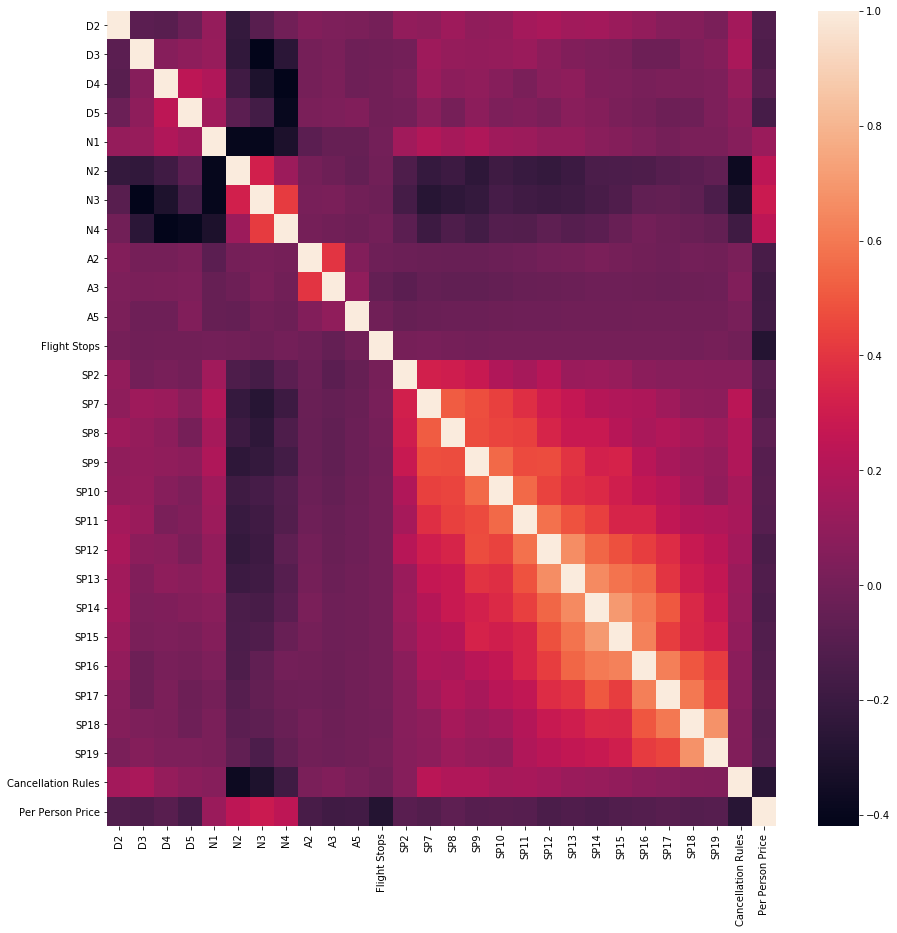

In [17]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_Train.corr())

In [18]:
print(df_Train.shape)
print(df_Test.shape)

(21000, 28)
(9000, 27)


In [19]:
X=df_Train.drop(['Per Person Price'],axis=1)
y=df_Train[['Per Person Price']]

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.176,random_state=33)

In [21]:
import optuna
from math import sqrt
import lightgbm as lgb

In [22]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_valid = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [23]:
from sklearn.metrics import mean_squared_log_error

In [24]:
def objective(trial):    
    params = {
            'num_leaves': trial.suggest_int('num_leaves', 22, 1012),
            'max_bin': trial.suggest_int('max_bin', 300, 1300),
            'objective': 'regression',
            'metric': 'RMSE',
            'learning_rate': trial.suggest_float('learning_rate',0.001,0.2),
            'random_state' : 33,
            'max_depth': trial.suggest_int('max_depth', 2, 22),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 52),
            'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1, 1.0),
            'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.1, 1.0),
            'bagging_freq': trial.suggest_int('bagging_freq', 1, 20),
            'min_child_samples': trial.suggest_int('min_child_samples', 3, 200),
            'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 1.0),
            'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 1.0),
            'early_stopping_rounds': 50
            }
    
    model = lgb.train(params, lgb_train, valid_sets=[lgb_valid], verbose_eval=100, num_boost_round=800)
    y_pred  = model.predict(X_test)
    score = np.sqrt(mean_squared_log_error(y_test, y_pred))
    print(f"RMSE = {score}")
    return score

In [25]:
study = optuna.create_study(direction = 'minimize')
study.optimize(objective, n_trials = 50)

[I 2021-04-07 20:21:29,968] A new study created in memory with name: no-name-f67deb0a-a359-4889-af5c-cd9f455f5149
D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 6444.55
[200]	valid_0's rmse: 6214.87
[300]	valid_0's rmse: 6096.67
[400]	valid_0's rmse: 6044.09
[500]	valid_0's rmse: 6011.89
[600]	valid_0's rmse: 5965.84
[700]	valid_0's rmse: 5949.34
[800]	valid_0's rmse: 5926.54
Did not meet early stopping. Best iteration is:
[800]	valid_0's rmse: 5926.54


[I 2021-04-07 20:21:33,521] Trial 0 finished with value: 0.2548812353150762 and parameters: {'num_leaves': 127, 'max_bin': 731, 'learning_rate': 0.11815939863803882, 'max_depth': 10, 'min_child_weight': 44, 'feature_fraction': 0.6445119591505375, 'bagging_fraction': 0.8438616743448304, 'bagging_freq': 14, 'min_child_samples': 3, 'lambda_l1': 1.1709001803482225e-08, 'lambda_l2': 4.414609571214226e-05}. Best is trial 0 with value: 0.2548812353150762.


RMSE = 0.2548812353150762
Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 7812.62
[200]	valid_0's rmse: 7458.15
[300]	valid_0's rmse: 7299.91

D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



[400]	valid_0's rmse: 7200.08
[500]	valid_0's rmse: 7115.03
[600]	valid_0's rmse: 7061.09


[I 2021-04-07 20:21:34,103] Trial 1 finished with value: 0.30351124259175 and parameters: {'num_leaves': 715, 'max_bin': 577, 'learning_rate': 0.17805292431271322, 'max_depth': 2, 'min_child_weight': 26, 'feature_fraction': 0.13683122636765271, 'bagging_fraction': 0.9340703818071251, 'bagging_freq': 16, 'min_child_samples': 121, 'lambda_l1': 1.7940839596009833e-08, 'lambda_l2': 4.9299960045328034e-08}. Best is trial 0 with value: 0.2548812353150762.


[700]	valid_0's rmse: 7032.52
[800]	valid_0's rmse: 6994.95
Did not meet early stopping. Best iteration is:
[799]	valid_0's rmse: 6994.87
RMSE = 0.30351124259175
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 7103.44
[200]	valid_0's rmse: 6664.13
[300]	valid_0's rmse: 6467.85
[400]	valid_0's rmse: 6373.82
[500]	valid_0's rmse: 6281.8
[600]	valid_0's rmse: 6220.36
[700]	valid_0's rmse: 6182.28
[800]	valid_0's rmse: 6135.67
Did not meet early stopping. Best iteration is:
[800]	valid_0's rmse: 6135.67


[I 2021-04-07 20:21:38,340] Trial 2 finished with value: 0.2590777330915197 and parameters: {'num_leaves': 356, 'max_bin': 722, 'learning_rate': 0.043308492882444746, 'max_depth': 20, 'min_child_weight': 52, 'feature_fraction': 0.47724684589002553, 'bagging_fraction': 0.4080478240620484, 'bagging_freq': 7, 'min_child_samples': 21, 'lambda_l1': 0.020298722054075204, 'lambda_l2': 1.8867766056969897e-05}. Best is trial 0 with value: 0.2548812353150762.


RMSE = 0.2590777330915197
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 6710.98
[200]	valid_0's rmse: 6440.8
[300]	valid_0's rmse: 6316.88
[400]	valid_0's rmse: 6224.69
[500]	valid_0's rmse: 6163.87
[600]	valid_0's rmse: 6134.32
[700]	valid_0's rmse: 6093.42
[800]	valid_0's rmse: 6056.33
Did not meet early stopping. Best iteration is:
[798]	valid_0's rmse: 6055.67


[I 2021-04-07 20:21:41,792] Trial 3 finished with value: 0.25790129752580027 and parameters: {'num_leaves': 540, 'max_bin': 1267, 'learning_rate': 0.13556173877085823, 'max_depth': 22, 'min_child_weight': 2, 'feature_fraction': 0.3478246127236978, 'bagging_fraction': 0.6508610393161353, 'bagging_freq': 1, 'min_child_samples': 120, 'lambda_l1': 3.2816675550899966e-08, 'lambda_l2': 0.2517501850308311}. Best is trial 0 with value: 0.2548812353150762.


RMSE = 0.25790129752580027
Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 7317.79

D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



[200]	valid_0's rmse: 6950.46
[300]	valid_0's rmse: 6781.4
[400]	valid_0's rmse: 6649.74
[500]	valid_0's rmse: 6575.02
[600]	valid_0's rmse: 6506.47
[700]	valid_0's rmse: 6448.54
[800]	valid_0's rmse: 6409.93
Did not meet early stopping. Best iteration is:
[800]	valid_0's rmse: 6409.93


[I 2021-04-07 20:21:43,319] Trial 4 finished with value: 0.2746500868769262 and parameters: {'num_leaves': 71, 'max_bin': 738, 'learning_rate': 0.09519187009156203, 'max_depth': 7, 'min_child_weight': 25, 'feature_fraction': 0.20326683036370707, 'bagging_fraction': 0.35051130512022555, 'bagging_freq': 4, 'min_child_samples': 59, 'lambda_l1': 0.050601697611947175, 'lambda_l2': 0.10072149497529949}. Best is trial 0 with value: 0.2548812353150762.


RMSE = 0.2746500868769262
Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 7310.96


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[200]	valid_0's rmse: 6936.3
[300]	valid_0's rmse: 6786.24
[400]	valid_0's rmse: 6720.3
[500]	valid_0's rmse: 6619.16
[600]	valid_0's rmse: 6578.3
[700]	valid_0's rmse: 6534.84


[I 2021-04-07 20:21:44,353] Trial 5 finished with value: 0.28002552917727136 and parameters: {'num_leaves': 55, 'max_bin': 1103, 'learning_rate': 0.0970129495120434, 'max_depth': 4, 'min_child_weight': 10, 'feature_fraction': 0.43050013043740454, 'bagging_fraction': 0.5835195989776271, 'bagging_freq': 13, 'min_child_samples': 42, 'lambda_l1': 2.506580696236172e-05, 'lambda_l2': 5.5023122730307686e-08}. Best is trial 0 with value: 0.2548812353150762.


[800]	valid_0's rmse: 6480.91
Did not meet early stopping. Best iteration is:
[800]	valid_0's rmse: 6480.91
RMSE = 0.28002552917727136
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 6690.99
[200]	valid_0's rmse: 6443.42
[300]	valid_0's rmse: 6329.41
[400]	valid_0's rmse: 6244.66
[500]	valid_0's rmse: 6177.05
[600]	valid_0's rmse: 6118.14
Early stopping, best iteration is:
[600]	valid_0's rmse: 6118.14


[I 2021-04-07 20:21:47,111] Trial 6 finished with value: 0.2600188815311495 and parameters: {'num_leaves': 999, 'max_bin': 584, 'learning_rate': 0.16936699858078846, 'max_depth': 20, 'min_child_weight': 33, 'feature_fraction': 0.3776290718496279, 'bagging_fraction': 0.4592333530070333, 'bagging_freq': 3, 'min_child_samples': 92, 'lambda_l1': 0.0025867235130088585, 'lambda_l2': 1.8603727910933218e-05}. Best is trial 0 with value: 0.2548812353150762.


RMSE = 0.2600188815311495
Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 8937.76


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[200]	valid_0's rmse: 8324.75
[300]	valid_0's rmse: 8046.33
[400]	valid_0's rmse: 7885.38
[500]	valid_0's rmse: 7780.98
[600]	valid_0's rmse: 7701.49
[700]	valid_0's rmse: 7653.06


[I 2021-04-07 20:21:48,115] Trial 7 finished with value: 0.3177349920041835 and parameters: {'num_leaves': 319, 'max_bin': 1014, 'learning_rate': 0.04299394540826225, 'max_depth': 21, 'min_child_weight': 7, 'feature_fraction': 0.14499248325756617, 'bagging_fraction': 0.11444842176433269, 'bagging_freq': 13, 'min_child_samples': 94, 'lambda_l1': 0.00012688705727065207, 'lambda_l2': 0.0006326657451382476}. Best is trial 0 with value: 0.2548812353150762.


[800]	valid_0's rmse: 7609.7
Did not meet early stopping. Best iteration is:
[787]	valid_0's rmse: 7606.58
RMSE = 0.3177349920041835
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 8923.2
[200]	valid_0's rmse: 7955.12
[300]	valid_0's rmse: 7556.9
[400]	valid_0's rmse: 7341.54
[500]	valid_0's rmse: 7186.75
[600]	valid_0's rmse: 7072.64
[700]	valid_0's rmse: 6996.08
[800]	valid_0's rmse: 6931.78
Did not meet early stopping. Best iteration is:
[800]	valid_0's rmse: 6931.78


[I 2021-04-07 20:21:50,582] Trial 8 finished with value: 0.28844600590349445 and parameters: {'num_leaves': 145, 'max_bin': 1139, 'learning_rate': 0.011289631408498944, 'max_depth': 8, 'min_child_weight': 20, 'feature_fraction': 0.5695380109493138, 'bagging_fraction': 0.8611692285682024, 'bagging_freq': 18, 'min_child_samples': 135, 'lambda_l1': 7.541050005663256e-07, 'lambda_l2': 9.803936208642592e-07}. Best is trial 0 with value: 0.2548812353150762.


RMSE = 0.28844600590349445
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 6344.67
[200]	valid_0's rmse: 6177.94
[300]	valid_0's rmse: 6059.77
[400]	valid_0's rmse: 6017.34
[500]	valid_0's rmse: 5983.06
[600]	valid_0's rmse: 5934.19
Early stopping, best iteration is:
[590]	valid_0's rmse: 5927.9


[I 2021-04-07 20:21:55,823] Trial 9 finished with value: 0.2524073640030911 and parameters: {'num_leaves': 552, 'max_bin': 733, 'learning_rate': 0.09577255656540028, 'max_depth': 17, 'min_child_weight': 26, 'feature_fraction': 0.6916901845044849, 'bagging_fraction': 0.46311243800233715, 'bagging_freq': 12, 'min_child_samples': 11, 'lambda_l1': 0.00011268655677926226, 'lambda_l2': 0.0005505849245936809}. Best is trial 9 with value: 0.2524073640030911.


RMSE = 0.2524073640030911


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 8197.01
[200]	valid_0's rmse: 7844.98
[300]	valid_0's rmse: 7637
[400]	valid_0's rmse: 7500.41
[500]	valid_0's rmse: 7371.44
[600]	valid_0's rmse: 7268.73
[700]	valid_0's rmse: 7199.39
[800]	valid_0's rmse: 7139.02
Did not meet early stopping. Best iteration is:
[793]	valid_0's rmse: 7135.31
RMSE = 0.3006428142644676

[I 2021-04-07 20:21:57,639] Trial 10 finished with value: 0.3006428142644676 and parameters: {'num_leaves': 828, 'max_bin': 383, 'learning_rate': 0.06681941293648164, 'max_depth': 15, 'min_child_weight': 38, 'feature_fraction': 0.9812709120556167, 'bagging_fraction': 0.18891669535106476, 'bagging_freq': 9, 'min_child_samples': 200, 'lambda_l1': 0.7706220758935156, 'lambda_l2': 0.004936298643155717}. Best is trial 9 with value: 0.2524073640030911.



Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 6332.51
[200]	valid_0's rmse: 6129.14
[300]	valid_0's rmse: 6034.24
[400]	valid_0's rmse: 6013.13
[500]	valid_0's rmse: 5960.28
[600]	valid_0's rmse: 5905.26
Early stopping, best iteration is:
[611]	valid_0's rmse: 5896.9


[I 2021-04-07 20:22:02,215] Trial 11 finished with value: 0.2510275879283649 and parameters: {'num_leaves': 528, 'max_bin': 864, 'learning_rate': 0.13982502436873653, 'max_depth': 15, 'min_child_weight': 49, 'feature_fraction': 0.7311209933739562, 'bagging_fraction': 0.7438375386528665, 'bagging_freq': 13, 'min_child_samples': 7, 'lambda_l1': 8.713704715241356e-06, 'lambda_l2': 0.0004462362994023261}. Best is trial 11 with value: 0.2510275879283649.


RMSE = 0.2510275879283649
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 6042.7
[200]	valid_0's rmse: 5976.42
Early stopping, best iteration is:
[202]	valid_0's rmse: 5972.85


[I 2021-04-07 20:22:04,903] Trial 12 finished with value: 0.25171790471161104 and parameters: {'num_leaves': 540, 'max_bin': 902, 'learning_rate': 0.1423251298148587, 'max_depth': 15, 'min_child_weight': 17, 'feature_fraction': 0.776162076630196, 'bagging_fraction': 0.7076536844790142, 'bagging_freq': 11, 'min_child_samples': 7, 'lambda_l1': 2.0020123334659768e-05, 'lambda_l2': 0.004713127944105085}. Best is trial 11 with value: 0.2510275879283649.


RMSE = 0.25171790471161104
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 6381.39
[200]	valid_0's rmse: 6145.54
[300]	valid_0's rmse: 6006.6
Early stopping, best iteration is:
[311]	valid_0's rmse: 5992.86


[I 2021-04-07 20:22:07,027] Trial 13 finished with value: 0.25542697622811533 and parameters: {'num_leaves': 701, 'max_bin': 971, 'learning_rate': 0.15043028190433408, 'max_depth': 14, 'min_child_weight': 15, 'feature_fraction': 0.8627659494346249, 'bagging_fraction': 0.7154168024169256, 'bagging_freq': 9, 'min_child_samples': 54, 'lambda_l1': 1.8394709660557895e-06, 'lambda_l2': 0.016344276592968884}. Best is trial 11 with value: 0.2510275879283649.


RMSE = 0.25542697622811533
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 6388.78
[200]	valid_0's rmse: 6202.66
[300]	valid_0's rmse: 6088.46
[400]	valid_0's rmse: 6030.66
[500]	valid_0's rmse: 5985.82
Early stopping, best iteration is:
[541]	valid_0's rmse: 5958.16


[I 2021-04-07 20:22:09,816] Trial 14 finished with value: 0.2549818444172956 and parameters: {'num_leaves': 339, 'max_bin': 944, 'learning_rate': 0.1962659128121597, 'max_depth': 12, 'min_child_weight': 51, 'feature_fraction': 0.8106200219374893, 'bagging_fraction': 0.7475325340224869, 'bagging_freq': 20, 'min_child_samples': 26, 'lambda_l1': 2.536016037589863e-06, 'lambda_l2': 0.004457683069083916}. Best is trial 11 with value: 0.2510275879283649.


RMSE = 0.2549818444172956
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 6695.48
[200]	valid_0's rmse: 6431.24
[300]	valid_0's rmse: 6270.18
[400]	valid_0's rmse: 6190.12
[500]	valid_0's rmse: 6122.13
[600]	valid_0's rmse: 6064.89
[700]	valid_0's rmse: 6022.73
[800]	valid_0's rmse: 5995.14
Did not meet early stopping. Best iteration is:
[796]	valid_0's rmse: 5995.12


[I 2021-04-07 20:22:13,363] Trial 15 finished with value: 0.25431186119707455 and parameters: {'num_leaves': 461, 'max_bin': 865, 'learning_rate': 0.14913488746135697, 'max_depth': 17, 'min_child_weight': 35, 'feature_fraction': 0.787514466630058, 'bagging_fraction': 0.963290184886493, 'bagging_freq': 16, 'min_child_samples': 179, 'lambda_l1': 1.915994917642755e-05, 'lambda_l2': 0.9056375539521121}. Best is trial 11 with value: 0.2510275879283649.


RMSE = 0.25431186119707455
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 6401.22
[200]	valid_0's rmse: 6168.24
[300]	valid_0's rmse: 6058.13
[400]	valid_0's rmse: 5984.55
[500]	valid_0's rmse: 5941.03
[600]	valid_0's rmse: 5941.63
Early stopping, best iteration is:
[580]	valid_0's rmse: 5923.74


[I 2021-04-07 20:22:17,472] Trial 16 finished with value: 0.2503333083134786 and parameters: {'num_leaves': 671, 'max_bin': 860, 'learning_rate': 0.125570642993311, 'max_depth': 17, 'min_child_weight': 17, 'feature_fraction': 0.9362285626099851, 'bagging_fraction': 0.80010263793204, 'bagging_freq': 10, 'min_child_samples': 62, 'lambda_l1': 1.8055933827947514e-07, 'lambda_l2': 0.0005496799088760377}. Best is trial 16 with value: 0.2503333083134786.


RMSE = 0.2503333083134786
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 6440.97
[200]	valid_0's rmse: 6203.47
[300]	valid_0's rmse: 6048.2
[400]	valid_0's rmse: 6004.92
[500]	valid_0's rmse: 5948.64
[600]	valid_0's rmse: 5913.83
[700]	valid_0's rmse: 5900.41
Early stopping, best iteration is:
[728]	valid_0's rmse: 5887.13


[I 2021-04-07 20:22:23,042] Trial 17 finished with value: 0.24911537134289494 and parameters: {'num_leaves': 899, 'max_bin': 586, 'learning_rate': 0.1145272011611564, 'max_depth': 18, 'min_child_weight': 44, 'feature_fraction': 0.9628205783401327, 'bagging_fraction': 0.8226996696078221, 'bagging_freq': 8, 'min_child_samples': 71, 'lambda_l1': 1.376455862499273e-07, 'lambda_l2': 2.5854756615837147e-06}. Best is trial 17 with value: 0.24911537134289494.


RMSE = 0.24911537134289494
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 6479.76
[200]	valid_0's rmse: 6193.66
[300]	valid_0's rmse: 6064.91
[400]	valid_0's rmse: 5994.5
[500]	valid_0's rmse: 5930.42
[600]	valid_0's rmse: 5905.44
[700]	valid_0's rmse: 5880.73
[800]	valid_0's rmse: 5865.63
Did not meet early stopping. Best iteration is:
[798]	valid_0's rmse: 5865.38


[I 2021-04-07 20:22:28,649] Trial 18 finished with value: 0.24957997471972104 and parameters: {'num_leaves': 1012, 'max_bin': 402, 'learning_rate': 0.1125936943956089, 'max_depth': 18, 'min_child_weight': 43, 'feature_fraction': 0.9793339756231113, 'bagging_fraction': 0.8321842439505558, 'bagging_freq': 6, 'min_child_samples': 78, 'lambda_l1': 2.1542858603321073e-07, 'lambda_l2': 2.082596856194021e-06}. Best is trial 17 with value: 0.24911537134289494.


RMSE = 0.24957997471972104
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 6578.27
[200]	valid_0's rmse: 6328.51
[300]	valid_0's rmse: 6203.35
[400]	valid_0's rmse: 6117.72
[500]	valid_0's rmse: 6072.27
[600]	valid_0's rmse: 6032.79
[700]	valid_0's rmse: 6001.71
[800]	valid_0's rmse: 5978.44
Did not meet early stopping. Best iteration is:
[800]	valid_0's rmse: 5978.44


[I 2021-04-07 20:22:34,236] Trial 19 finished with value: 0.25156225396009124 and parameters: {'num_leaves': 993, 'max_bin': 302, 'learning_rate': 0.0746738990909918, 'max_depth': 19, 'min_child_weight': 43, 'feature_fraction': 0.9153416408975374, 'bagging_fraction': 0.979674853885441, 'bagging_freq': 6, 'min_child_samples': 79, 'lambda_l1': 1.3222686476320426e-07, 'lambda_l2': 2.3567495936125184e-06}. Best is trial 17 with value: 0.24911537134289494.


RMSE = 0.25156225396009124
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 6950.61
[200]	valid_0's rmse: 6653.78
[300]	valid_0's rmse: 6487.18
[400]	valid_0's rmse: 6374.45
[500]	valid_0's rmse: 6299.52
[600]	valid_0's rmse: 6234.98
[700]	valid_0's rmse: 6187.24
[800]	valid_0's rmse: 6143.63
Did not meet early stopping. Best iteration is:
[798]	valid_0's rmse: 6142.41


[I 2021-04-07 20:22:36,894] Trial 20 finished with value: 0.25980839533085615 and parameters: {'num_leaves': 894, 'max_bin': 449, 'learning_rate': 0.11777298475641154, 'max_depth': 12, 'min_child_weight': 44, 'feature_fraction': 0.978487452359265, 'bagging_fraction': 0.5960320350120872, 'bagging_freq': 6, 'min_child_samples': 155, 'lambda_l1': 1.4070661822577667e-07, 'lambda_l2': 6.48337258939633e-07}. Best is trial 17 with value: 0.24911537134289494.


RMSE = 0.25980839533085615
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 6513.96
[200]	valid_0's rmse: 6275.19
[300]	valid_0's rmse: 6110.89
[400]	valid_0's rmse: 6054.22
[500]	valid_0's rmse: 6000.8
[600]	valid_0's rmse: 5951.2
Early stopping, best iteration is:
[608]	valid_0's rmse: 5949.55


[I 2021-04-07 20:22:41,255] Trial 21 finished with value: 0.25170136892232353 and parameters: {'num_leaves': 861, 'max_bin': 566, 'learning_rate': 0.11116592606460585, 'max_depth': 18, 'min_child_weight': 32, 'feature_fraction': 0.995704165760067, 'bagging_fraction': 0.8507004209367639, 'bagging_freq': 9, 'min_child_samples': 74, 'lambda_l1': 1.289501430863917e-07, 'lambda_l2': 6.368624098592898e-06}. Best is trial 17 with value: 0.24911537134289494.


RMSE = 0.25170136892232353
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 6636.04
[200]	valid_0's rmse: 6358.5
[300]	valid_0's rmse: 6237.09
[400]	valid_0's rmse: 6129.71
[500]	valid_0's rmse: 6063.2
[600]	valid_0's rmse: 6011.28
[700]	valid_0's rmse: 5992.03
[800]	valid_0's rmse: 5970.46
Did not meet early stopping. Best iteration is:
[773]	valid_0's rmse: 5969.32


[I 2021-04-07 20:22:46,097] Trial 22 finished with value: 0.252510976448351 and parameters: {'num_leaves': 715, 'max_bin': 451, 'learning_rate': 0.074652435575886, 'max_depth': 17, 'min_child_weight': 39, 'feature_fraction': 0.9004281674465429, 'bagging_fraction': 0.8489937588698335, 'bagging_freq': 7, 'min_child_samples': 77, 'lambda_l1': 3.2913067918785995e-07, 'lambda_l2': 4.861914826203142e-07}. Best is trial 17 with value: 0.24911537134289494.


RMSE = 0.252510976448351
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 6214.81
[200]	valid_0's rmse: 6033.82
[300]	valid_0's rmse: 5943.72
[400]	valid_0's rmse: 5910.66
[500]	valid_0's rmse: 5887.13
Early stopping, best iteration is:
[515]	valid_0's rmse: 5876.4


[I 2021-04-07 20:22:52,023] Trial 23 finished with value: 0.24756277377167135 and parameters: {'num_leaves': 940, 'max_bin': 637, 'learning_rate': 0.1256941623992159, 'max_depth': 22, 'min_child_weight': 20, 'feature_fraction': 0.914639553915852, 'bagging_fraction': 0.9106656449549365, 'bagging_freq': 10, 'min_child_samples': 43, 'lambda_l1': 1.3886693796460875e-08, 'lambda_l2': 9.525809139809877e-05}. Best is trial 23 with value: 0.24756277377167135.


RMSE = 0.24756277377167135
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 6097.5
[200]	valid_0's rmse: 5968.74
[300]	valid_0's rmse: 5935.28
[400]	valid_0's rmse: 5915.07
[500]	valid_0's rmse: 5898.87
[600]	valid_0's rmse: 5890.98
Early stopping, best iteration is:
[647]	valid_0's rmse: 5888.6


[I 2021-04-07 20:22:59,456] Trial 24 finished with value: 0.24801048666917247 and parameters: {'num_leaves': 935, 'max_bin': 637, 'learning_rate': 0.1596334257346477, 'max_depth': 22, 'min_child_weight': 30, 'feature_fraction': 0.8470612354586702, 'bagging_fraction': 0.9980815350782851, 'bagging_freq': 4, 'min_child_samples': 39, 'lambda_l1': 1.2383199284169647e-08, 'lambda_l2': 2.2220658304637984e-07}. Best is trial 23 with value: 0.24756277377167135.


RMSE = 0.24801048666917247
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 6090.67
[200]	valid_0's rmse: 5965.18
[300]	valid_0's rmse: 5923.03
[400]	valid_0's rmse: 5912.97
Early stopping, best iteration is:
[427]	valid_0's rmse: 5906.43


[I 2021-04-07 20:23:04,726] Trial 25 finished with value: 0.24825437978132175 and parameters: {'num_leaves': 928, 'max_bin': 634, 'learning_rate': 0.17237476305317914, 'max_depth': 22, 'min_child_weight': 30, 'feature_fraction': 0.8510372380839157, 'bagging_fraction': 0.9982271344512558, 'bagging_freq': 3, 'min_child_samples': 35, 'lambda_l1': 1.1779987663443381e-08, 'lambda_l2': 1.5620634388291045e-07}. Best is trial 23 with value: 0.24756277377167135.


RMSE = 0.24825437978132175
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 6052.08
[200]	valid_0's rmse: 5945.85
[300]	valid_0's rmse: 5908.46
[400]	valid_0's rmse: 5897.95
Early stopping, best iteration is:
[442]	valid_0's rmse: 5886.14


[I 2021-04-07 20:23:10,314] Trial 26 finished with value: 0.2489480786830051 and parameters: {'num_leaves': 796, 'max_bin': 645, 'learning_rate': 0.1915268735603207, 'max_depth': 22, 'min_child_weight': 22, 'feature_fraction': 0.8360345534908217, 'bagging_fraction': 0.9930216248882987, 'bagging_freq': 1, 'min_child_samples': 38, 'lambda_l1': 1.3169469108108255e-08, 'lambda_l2': 1.9337282047478423e-07}. Best is trial 23 with value: 0.24756277377167135.


RMSE = 0.2489480786830051
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 6074.61
[200]	valid_0's rmse: 5958.49
[300]	valid_0's rmse: 5899.89
[400]	valid_0's rmse: 5882.31
[500]	valid_0's rmse: 5863.53
Early stopping, best iteration is:
[475]	valid_0's rmse: 5857.03


[I 2021-04-07 20:23:16,711] Trial 27 finished with value: 0.2471738897271489 and parameters: {'num_leaves': 925, 'max_bin': 500, 'learning_rate': 0.16611574765118073, 'max_depth': 22, 'min_child_weight': 29, 'feature_fraction': 0.6502756967984282, 'bagging_fraction': 0.9186499452866973, 'bagging_freq': 4, 'min_child_samples': 36, 'lambda_l1': 4.600564203538192e-08, 'lambda_l2': 1.4456981855525806e-08}. Best is trial 27 with value: 0.2471738897271489.


RMSE = 0.2471738897271489
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 6106.53
[200]	valid_0's rmse: 5950.15
[300]	valid_0's rmse: 5892.91
[400]	valid_0's rmse: 5856.66
[500]	valid_0's rmse: 5837.66
[600]	valid_0's rmse: 5826.93
Early stopping, best iteration is:
[636]	valid_0's rmse: 5810.53


[I 2021-04-07 20:23:23,420] Trial 28 finished with value: 0.24645019109436 and parameters: {'num_leaves': 785, 'max_bin': 500, 'learning_rate': 0.1554548331354835, 'max_depth': 21, 'min_child_weight': 29, 'feature_fraction': 0.5940045683266111, 'bagging_fraction': 0.9216206914189919, 'bagging_freq': 4, 'min_child_samples': 46, 'lambda_l1': 3.571209645294287e-08, 'lambda_l2': 2.829998497896674e-08}. Best is trial 28 with value: 0.24645019109436.


RMSE = 0.24645019109436
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 6149.36
[200]	valid_0's rmse: 6008.62
[300]	valid_0's rmse: 5945.81
[400]	valid_0's rmse: 5927.47
Early stopping, best iteration is:
[357]	valid_0's rmse: 5922.34


[I 2021-04-07 20:23:26,976] Trial 29 finished with value: 0.24890852865980181 and parameters: {'num_leaves': 648, 'max_bin': 501, 'learning_rate': 0.1880364457916364, 'max_depth': 20, 'min_child_weight': 22, 'feature_fraction': 0.6124302644948982, 'bagging_fraction': 0.921211163053304, 'bagging_freq': 2, 'min_child_samples': 51, 'lambda_l1': 4.195158414140111e-08, 'lambda_l2': 1.0985441443622353e-08}. Best is trial 28 with value: 0.24645019109436.


RMSE = 0.24890852865980181
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 5965.49
[200]	valid_0's rmse: 5859.69
[300]	valid_0's rmse: 5825.05
[400]	valid_0's rmse: 5828.98
Early stopping, best iteration is:
[351]	valid_0's rmse: 5822.47


[I 2021-04-07 20:23:32,376] Trial 30 finished with value: 0.2467079397571762 and parameters: {'num_leaves': 824, 'max_bin': 506, 'learning_rate': 0.1603628498909454, 'max_depth': 21, 'min_child_weight': 29, 'feature_fraction': 0.6544151729818619, 'bagging_fraction': 0.9076140152945914, 'bagging_freq': 15, 'min_child_samples': 20, 'lambda_l1': 4.2577560096695036e-08, 'lambda_l2': 2.3352142968481595e-08}. Best is trial 28 with value: 0.24645019109436.


RMSE = 0.2467079397571762
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 6070.6
[200]	valid_0's rmse: 5960.56
[300]	valid_0's rmse: 5903.08
[400]	valid_0's rmse: 5875.82
[500]	valid_0's rmse: 5874.62
Early stopping, best iteration is:
[457]	valid_0's rmse: 5860.18


[I 2021-04-07 20:23:38,756] Trial 31 finished with value: 0.24721525553736026 and parameters: {'num_leaves': 781, 'max_bin': 301, 'learning_rate': 0.1606855003872694, 'max_depth': 21, 'min_child_weight': 29, 'feature_fraction': 0.6601042411236744, 'bagging_fraction': 0.8980422128361341, 'bagging_freq': 16, 'min_child_samples': 22, 'lambda_l1': 5.0064015686861425e-08, 'lambda_l2': 1.513575680989137e-08}. Best is trial 28 with value: 0.24645019109436.


RMSE = 0.24721525553736026
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 6034.92
[200]	valid_0's rmse: 5912.68
[300]	valid_0's rmse: 5872.14
Early stopping, best iteration is:
[336]	valid_0's rmse: 5854.14


[I 2021-04-07 20:23:43,478] Trial 32 finished with value: 0.2475512180440106 and parameters: {'num_leaves': 802, 'max_bin': 303, 'learning_rate': 0.16159004052301593, 'max_depth': 20, 'min_child_weight': 29, 'feature_fraction': 0.6388577685889819, 'bagging_fraction': 0.9033658935932414, 'bagging_freq': 16, 'min_child_samples': 20, 'lambda_l1': 4.177463448239783e-08, 'lambda_l2': 1.0200211108552377e-08}. Best is trial 28 with value: 0.24645019109436.


RMSE = 0.2475512180440106
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 6029.83
[200]	valid_0's rmse: 5907.47
[300]	valid_0's rmse: 5857.58
[400]	valid_0's rmse: 5857.34
Early stopping, best iteration is:
[422]	valid_0's rmse: 5834.87


[I 2021-04-07 20:23:48,537] Trial 33 finished with value: 0.2474259054895362 and parameters: {'num_leaves': 758, 'max_bin': 364, 'learning_rate': 0.18337906511958968, 'max_depth': 21, 'min_child_weight': 37, 'feature_fraction': 0.518617736351886, 'bagging_fraction': 0.9016674188573228, 'bagging_freq': 15, 'min_child_samples': 24, 'lambda_l1': 8.766627976877299e-07, 'lambda_l2': 2.955903770628303e-08}. Best is trial 28 with value: 0.24645019109436.


RMSE = 0.2474259054895362
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 6108.71
[200]	valid_0's rmse: 5958.81
[300]	valid_0's rmse: 5907.34
Early stopping, best iteration is:
[318]	valid_0's rmse: 5899.69


[I 2021-04-07 20:23:52,520] Trial 34 finished with value: 0.2495629097716496 and parameters: {'num_leaves': 770, 'max_bin': 477, 'learning_rate': 0.15974144206877028, 'max_depth': 19, 'min_child_weight': 28, 'feature_fraction': 0.7028119029247707, 'bagging_fraction': 0.7834903370295965, 'bagging_freq': 18, 'min_child_samples': 3, 'lambda_l1': 3.610895770764702e-08, 'lambda_l2': 3.065929965559664e-08}. Best is trial 28 with value: 0.24645019109436.


RMSE = 0.2495629097716496
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 5897.54
[200]	valid_0's rmse: 5843.32
[300]	valid_0's rmse: 5821.81
Early stopping, best iteration is:
[305]	valid_0's rmse: 5820.28


[I 2021-04-07 20:23:56,993] Trial 35 finished with value: 0.24815861255114058 and parameters: {'num_leaves': 633, 'max_bin': 343, 'learning_rate': 0.19927577142131786, 'max_depth': 21, 'min_child_weight': 25, 'feature_fraction': 0.5664546266705137, 'bagging_fraction': 0.9477572942113881, 'bagging_freq': 18, 'min_child_samples': 19, 'lambda_l1': 4.9722077263663425e-08, 'lambda_l2': 1.044760211855033e-08}. Best is trial 28 with value: 0.24645019109436.


RMSE = 0.24815861255114058
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 6121.4
[200]	valid_0's rmse: 6013.18
Early stopping, best iteration is:
[225]	valid_0's rmse: 5974.17


[I 2021-04-07 20:23:59,193] Trial 36 finished with value: 0.25229354146385846 and parameters: {'num_leaves': 602, 'max_bin': 486, 'learning_rate': 0.17696868003600172, 'max_depth': 19, 'min_child_weight': 34, 'feature_fraction': 0.5003088232490613, 'bagging_fraction': 0.6611533755117585, 'bagging_freq': 20, 'min_child_samples': 32, 'lambda_l1': 5.392191627762168e-07, 'lambda_l2': 6.349320510677016e-08}. Best is trial 28 with value: 0.24645019109436.


RMSE = 0.25229354146385846
Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 7733.85


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[200]	valid_0's rmse: 7327.07
[300]	valid_0's rmse: 7160.98
[400]	valid_0's rmse: 7088.97
[500]	valid_0's rmse: 7014.38
[600]	valid_0's rmse: 6953.43
[700]	valid_0's rmse: 6886.23
[800]	valid_0's rmse: 6839.88
Did not meet early stopping. Best iteration is:
[797]	valid_0's rmse: 6836.55


[I 2021-04-07 20:23:59,846] Trial 37 finished with value: 0.30002160354938917 and parameters: {'num_leaves': 740, 'max_bin': 530, 'learning_rate': 0.13084779763483023, 'max_depth': 2, 'min_child_weight': 26, 'feature_fraction': 0.6129101358173192, 'bagging_fraction': 0.882628052594419, 'bagging_freq': 15, 'min_child_samples': 14, 'lambda_l1': 0.0007238809727817737, 'lambda_l2': 2.0631056292270987e-08}. Best is trial 28 with value: 0.24645019109436.


RMSE = 0.30002160354938917
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 7090.33
[200]	valid_0's rmse: 6758.22
[300]	valid_0's rmse: 6622.43
[400]	valid_0's rmse: 6521.95
[500]	valid_0's rmse: 6425.2
[600]	valid_0's rmse: 6339.81
Early stopping, best iteration is:
[600]	valid_0's rmse: 6339.81


[I 2021-04-07 20:24:01,549] Trial 38 finished with value: 0.2700077288163324 and parameters: {'num_leaves': 862, 'max_bin': 704, 'learning_rate': 0.167329980440826, 'max_depth': 21, 'min_child_weight': 32, 'feature_fraction': 0.42199028218162626, 'bagging_fraction': 0.29228732228083976, 'bagging_freq': 17, 'min_child_samples': 108, 'lambda_l1': 1.776048015337666e-06, 'lambda_l2': 8.283804316991396e-08}. Best is trial 28 with value: 0.24645019109436.


RMSE = 0.2700077288163324
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 6757.37
[200]	valid_0's rmse: 6526.03
[300]	valid_0's rmse: 6403.54
[400]	valid_0's rmse: 6305.39
[500]	valid_0's rmse: 6248.61
[600]	valid_0's rmse: 6204.94
[700]	valid_0's rmse: 6177.68
[800]	valid_0's rmse: 6123.87
Did not meet early stopping. Best iteration is:
[800]	valid_0's rmse: 6123.87


[I 2021-04-07 20:24:03,003] Trial 39 finished with value: 0.26518778015574956 and parameters: {'num_leaves': 459, 'max_bin': 404, 'learning_rate': 0.1525380453066161, 'max_depth': 5, 'min_child_weight': 24, 'feature_fraction': 0.675362246739055, 'bagging_fraction': 0.9520226532601079, 'bagging_freq': 4, 'min_child_samples': 50, 'lambda_l1': 4.854216314551336e-06, 'lambda_l2': 1.2057620663549149e-08}. Best is trial 28 with value: 0.24645019109436.


RMSE = 0.26518778015574956
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 6410.39
[200]	valid_0's rmse: 6196.78
[300]	valid_0's rmse: 6082.99
[400]	valid_0's rmse: 6026.52
[500]	valid_0's rmse: 5991.99
[600]	valid_0's rmse: 5961.44
[700]	valid_0's rmse: 5931.36
[800]	valid_0's rmse: 5905.61
Did not meet early stopping. Best iteration is:
[798]	valid_0's rmse: 5905.58


[I 2021-04-07 20:24:06,093] Trial 40 finished with value: 0.2533248881527728 and parameters: {'num_leaves': 845, 'max_bin': 301, 'learning_rate': 0.1804783519061156, 'max_depth': 10, 'min_child_weight': 40, 'feature_fraction': 0.7481911882770739, 'bagging_fraction': 0.7823781417151148, 'bagging_freq': 5, 'min_child_samples': 60, 'lambda_l1': 7.453762882579998e-08, 'lambda_l2': 3.5599943568670896e-07}. Best is trial 28 with value: 0.24645019109436.


RMSE = 0.2533248881527728
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 6019.77
[200]	valid_0's rmse: 5931.77
[300]	valid_0's rmse: 5878.22
Early stopping, best iteration is:
[329]	valid_0's rmse: 5870.74


[I 2021-04-07 20:24:10,211] Trial 41 finished with value: 0.24899404804061265 and parameters: {'num_leaves': 759, 'max_bin': 348, 'learning_rate': 0.17962421557351016, 'max_depth': 21, 'min_child_weight': 36, 'feature_fraction': 0.521644255366195, 'bagging_fraction': 0.8945343116319702, 'bagging_freq': 15, 'min_child_samples': 27, 'lambda_l1': 7.174009695155755e-07, 'lambda_l2': 3.392641722197223e-08}. Best is trial 28 with value: 0.24645019109436.


RMSE = 0.24899404804061265
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 6016.57
[200]	valid_0's rmse: 5930.54
[300]	valid_0's rmse: 5884.83
[400]	valid_0's rmse: 5855.66
[500]	valid_0's rmse: 5842.14
[600]	valid_0's rmse: 5833.66
Early stopping, best iteration is:
[571]	valid_0's rmse: 5824.37


[I 2021-04-07 20:24:17,344] Trial 42 finished with value: 0.24707157634691054 and parameters: {'num_leaves': 962, 'max_bin': 435, 'learning_rate': 0.1886678494252375, 'max_depth': 21, 'min_child_weight': 36, 'feature_fraction': 0.4668583326082053, 'bagging_fraction': 0.933482526896731, 'bagging_freq': 14, 'min_child_samples': 26, 'lambda_l1': 3.1599485950229026e-08, 'lambda_l2': 8.14208527817919e-08}. Best is trial 28 with value: 0.24645019109436.


RMSE = 0.24707157634691054
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 5959.18
[200]	valid_0's rmse: 5886.63
[300]	valid_0's rmse: 5861.19
[400]	valid_0's rmse: 5837.16
Early stopping, best iteration is:
[380]	valid_0's rmse: 5835.3


[I 2021-04-07 20:24:22,456] Trial 43 finished with value: 0.2479279217504183 and parameters: {'num_leaves': 980, 'max_bin': 537, 'learning_rate': 0.19990666568189003, 'max_depth': 22, 'min_child_weight': 32, 'feature_fraction': 0.32901266216102126, 'bagging_fraction': 0.9387070082013308, 'bagging_freq': 14, 'min_child_samples': 4, 'lambda_l1': 2.324784178746242e-08, 'lambda_l2': 8.808224975949724e-08}. Best is trial 28 with value: 0.24645019109436.


RMSE = 0.2479279217504183
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 5958.98
[200]	valid_0's rmse: 5902.82
[300]	valid_0's rmse: 5841.5
[400]	valid_0's rmse: 5824.44
Early stopping, best iteration is:
[399]	valid_0's rmse: 5823.97


[I 2021-04-07 20:24:28,257] Trial 44 finished with value: 0.2467379248563961 and parameters: {'num_leaves': 948, 'max_bin': 404, 'learning_rate': 0.16863460729079063, 'max_depth': 20, 'min_child_weight': 29, 'feature_fraction': 0.586117906480367, 'bagging_fraction': 0.8670810163728875, 'bagging_freq': 12, 'min_child_samples': 15, 'lambda_l1': 7.821749473953642e-08, 'lambda_l2': 1.784393641293553e-08}. Best is trial 28 with value: 0.24645019109436.


RMSE = 0.2467379248563961
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 5954.2
[200]	valid_0's rmse: 5886.86
[300]	valid_0's rmse: 5848.16
[400]	valid_0's rmse: 5819.6
[500]	valid_0's rmse: 5810.38
[600]	valid_0's rmse: 5800.2
[700]	valid_0's rmse: 5794.39
[800]	valid_0's rmse: 5789.79
Did not meet early stopping. Best iteration is:
[767]	valid_0's rmse: 5789.4


[I 2021-04-07 20:24:37,923] Trial 45 finished with value: 0.24758412404507416 and parameters: {'num_leaves': 970, 'max_bin': 437, 'learning_rate': 0.16976737923480023, 'max_depth': 20, 'min_child_weight': 28, 'feature_fraction': 0.45297632570067203, 'bagging_fraction': 0.9988742619894339, 'bagging_freq': 12, 'min_child_samples': 14, 'lambda_l1': 1.0758586819649561e-08, 'lambda_l2': 1.038967338409294e-07}. Best is trial 28 with value: 0.24645019109436.


RMSE = 0.24758412404507416
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 6145.42
[200]	valid_0's rmse: 5983.39
[300]	valid_0's rmse: 5889.78
[400]	valid_0's rmse: 5866.42
[500]	valid_0's rmse: 5852.45
[600]	valid_0's rmse: 5824.16
[700]	valid_0's rmse: 5809.39
Early stopping, best iteration is:
[708]	valid_0's rmse: 5803.98


[I 2021-04-07 20:24:44,664] Trial 46 finished with value: 0.24702016467829715 and parameters: {'num_leaves': 1009, 'max_bin': 535, 'learning_rate': 0.14638752063525787, 'max_depth': 19, 'min_child_weight': 41, 'feature_fraction': 0.5898651827866009, 'bagging_fraction': 0.8669184336599209, 'bagging_freq': 12, 'min_child_samples': 45, 'lambda_l1': 0.2619496528265484, 'lambda_l2': 4.6019743871817355e-08}. Best is trial 28 with value: 0.24645019109436.


RMSE = 0.24702016467829715
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 6320.7
[200]	valid_0's rmse: 6110.46
[300]	valid_0's rmse: 5996.07
[400]	valid_0's rmse: 5972.84
[500]	valid_0's rmse: 5955.12
[600]	valid_0's rmse: 5911.49
[700]	valid_0's rmse: 5884.87
Early stopping, best iteration is:
[705]	valid_0's rmse: 5882.13


[I 2021-04-07 20:24:49,679] Trial 47 finished with value: 0.2491746838297737 and parameters: {'num_leaves': 880, 'max_bin': 775, 'learning_rate': 0.14329663743219634, 'max_depth': 16, 'min_child_weight': 48, 'feature_fraction': 0.5803714707858095, 'bagging_fraction': 0.7492501987321231, 'bagging_freq': 12, 'min_child_samples': 45, 'lambda_l1': 0.007670203546535033, 'lambda_l2': 4.397752375229531e-08}. Best is trial 28 with value: 0.24645019109436.


RMSE = 0.2491746838297737
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 6594.76
[200]	valid_0's rmse: 6311.85
[300]	valid_0's rmse: 6176.35
[400]	valid_0's rmse: 6088.54
[500]	valid_0's rmse: 6035.23
[600]	valid_0's rmse: 6012.64
[700]	valid_0's rmse: 5966.42
[800]	valid_0's rmse: 5960.24
Did not meet early stopping. Best iteration is:
[757]	valid_0's rmse: 5951.54


[I 2021-04-07 20:24:53,321] Trial 48 finished with value: 0.2559969995196423 and parameters: {'num_leaves': 827, 'max_bin': 418, 'learning_rate': 0.13423935795610747, 'max_depth': 19, 'min_child_weight': 40, 'feature_fraction': 0.3836051106233339, 'bagging_fraction': 0.6618722215233991, 'bagging_freq': 14, 'min_child_samples': 93, 'lambda_l1': 0.0034864358396368236, 'lambda_l2': 2.8992586155384845e-07}. Best is trial 28 with value: 0.24645019109436.


RMSE = 0.2559969995196423
Training until validation scores don't improve for 50 rounds


D:\anaconda\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 6348.14
[200]	valid_0's rmse: 6106.07
[300]	valid_0's rmse: 6002.38
[400]	valid_0's rmse: 5934.84
Early stopping, best iteration is:
[449]	valid_0's rmse: 5916.02


[I 2021-04-07 20:24:56,415] Trial 49 finished with value: 0.2529305235652356 and parameters: {'num_leaves': 963, 'max_bin': 692, 'learning_rate': 0.15031029426866993, 'max_depth': 20, 'min_child_weight': 34, 'feature_fraction': 0.2894223667295487, 'bagging_fraction': 0.8609227033873658, 'bagging_freq': 11, 'min_child_samples': 67, 'lambda_l1': 0.00039584713129844977, 'lambda_l2': 2.2404102449328898e-05}. Best is trial 28 with value: 0.24645019109436.


RMSE = 0.2529305235652356


In [26]:
print(f"Trials : {len(study.trials)}")
print(f"Best Trial : {study.best_trial}")
best = study.best_trial
for i, j in best.params.items():
    print(f"{i} : {j}")
print(f"{best.value}")

Trials : 50
Best Trial : FrozenTrial(number=28, values=[0.24645019109436], datetime_start=datetime.datetime(2021, 4, 7, 20, 23, 16, 713628), datetime_complete=datetime.datetime(2021, 4, 7, 20, 23, 23, 418979), params={'num_leaves': 785, 'max_bin': 500, 'learning_rate': 0.1554548331354835, 'max_depth': 21, 'min_child_weight': 29, 'feature_fraction': 0.5940045683266111, 'bagging_fraction': 0.9216206914189919, 'bagging_freq': 4, 'min_child_samples': 46, 'lambda_l1': 3.571209645294287e-08, 'lambda_l2': 2.829998497896674e-08}, distributions={'num_leaves': IntUniformDistribution(high=1012, low=22, step=1), 'max_bin': IntUniformDistribution(high=1300, low=300, step=1), 'learning_rate': UniformDistribution(high=0.2, low=0.001), 'max_depth': IntUniformDistribution(high=22, low=2, step=1), 'min_child_weight': IntUniformDistribution(high=52, low=1, step=1), 'feature_fraction': UniformDistribution(high=1.0, low=0.1), 'bagging_fraction': UniformDistribution(high=1.0, low=0.1), 'bagging_freq': IntUn

In [288]:
import lightgbm as lgb
clf = lgb.LGBMRegressor(learning_rate=0.42, num_leaves=102, max_depth=9)
clf.fit(X_train, y_train)

LGBMRegressor(learning_rate=0.42, max_depth=9, num_leaves=102)

In [289]:
pred = clf.predict(X_test)

from sklearn.metrics import r2_score
print(r2_score(y_test, pred))

0.7327677296964832


In [290]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y_test, pred))

0.2625996127730414